In [1]:
#Import relevant modules
import numpy as np
import pandas as pd

In [2]:
#Input All data file names
edges_file = 'Locations/Massachusetts/edges.csv'
flow_so_file = 'Locations/Massachusetts/output_so/flow.csv'
flow_ue_file = 'Locations/Massachusetts/output_ue/flow.csv'
paths_so_file = 'Locations/Massachusetts/output_so/paths.csv'
paths_ue_file = 'Locations/Massachusetts/output_ue/paths.csv'
weights_so_file = 'Locations/Massachusetts/output_so/weights.csv'
weights_ue_file = 'Locations/Massachusetts/output_ue/weights.csv'
od_file = 'Locations/Massachusetts/od.csv'

# Major Code

In [3]:
edges = pd.read_csv(edges_file)
edges_arr = np.array(edges)
edges_arr = np.c_[edges_arr, np.array(range(len(edges)))]

flow_so = pd.read_csv(flow_so_file, skiprows = 1)
flow_so_arr = np.array(flow_so)

flow_ue = pd.read_csv(flow_ue_file, skiprows = 1)
flow_ue_arr = np.array(flow_ue)

In [4]:
def find_edge2(tail_, head_):
    '''Finds edge index for given edge'''
    
    edges_filtered = edges_arr[edges_arr[:, 0] == tail_]
    edges_filtered = edges_filtered[edges_filtered[:, 1] == head_]
    
    return edges_filtered[0, -1]

In [5]:
#Update Flow UE data
edge_num_ue_arr = []
for j in flow_ue.index:
    tail_value = int(flow_ue_arr[j, 1])
    head_value = int(flow_ue_arr[j, 2])
    edge_num_ue_arr.append(find_edge2(tail_value, head_value))

flow_ue_arr = np.c_[flow_ue_arr, edge_num_ue_arr]

In [6]:
#Update Flow SO data
edge_num_so_arr = []
for j in flow_so.index:
    tail_value = int(flow_so_arr[j, 1])
    head_value = int(flow_so_arr[j, 2])
    edge_num_so_arr.append(find_edge2(tail_value, head_value))

flow_so_arr = np.c_[flow_so_arr, edge_num_so_arr]

In [7]:
#Sort flows based on edge indices
flow_ue_arr = flow_ue_arr[flow_ue_arr[:,-1].argsort()]
flow_so_arr = flow_so_arr[flow_so_arr[:,-1].argsort()]

In [8]:
#Store the UE and SO solutions
x_UE_sol = flow_ue_arr[:, 6]
y_SO_sol = flow_so_arr[:, 6]

x_UE_sol = np.array([float(i) for i in x_UE_sol])
y_SO_sol = np.array([float(i) for i in y_SO_sol])

In [9]:
#Define the link latency functions
def link_latency(a_val, power_val, link_ff_cost, link_capacity, link_flow):
    '''Calculates latency of link'''
    return link_ff_cost*(1+a_val*(link_flow/link_capacity)**power_val)

In [10]:
def get_travel_time(sol_implement):
    '''Find the total travel time in a given network'''
    
    return sum([sol_implement[j_val]*link_latency(0.15, 4, int(flow_so_arr[j_val, 3]),  edges_arr[j_val, 3], sol_implement[j_val]) for j_val in range(len(sol_implement))])


In [11]:
paths_so = pd.read_csv(paths_so_file, sep='delimiter', header=None)
paths_ue = pd.read_csv(paths_ue_file, sep='delimiter', header=None)

paths_so = paths_so.iloc[2:]
paths_so = paths_so[0].str.split(',', 2, expand = True)
paths_arr_so = np.array(paths_so)

paths_ue = paths_ue.iloc[2:]
paths_ue = paths_ue[0].str.split(',', 2, expand = True)
paths_arr_ue = np.array(paths_ue)

/Users/devanshjalota/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/Users/devanshjalota/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [12]:
weights_ue = pd.read_csv(weights_ue_file, skiprows = 1)
weights_ue_arr = np.array(weights_ue)

#Check if weight is at least 1/10th of the maximum weight
small_arr = []
for i in range(len(weights_ue_arr)):
    if weights_ue_arr[i, 1] > max(weights_ue_arr[:, 1])/2:
        small_arr.append(i)
        
#weig = []
#for i in paths_arr_ue[:, 0]:
#    weig.append([weights_ue_arr[int(i)-1, 1]])
    
#Find unique paths
paths_arr_ue[:, 0] = [int(i) for i in paths_arr_ue[:, 0]]
#paths_arr_ue = np.append(paths_arr_ue, np.array(weig), axis=1)
paths_arr_ue = paths_arr_ue[paths_arr_ue[:, 0]>=min(small_arr)]
paths_arr_ue_new = paths_arr_ue[:, 1:]
paths_arr_ue_new = np.vstack({tuple(row) for row in paths_arr_ue_new})

/Users/devanshjalota/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [13]:
weights_so = pd.read_csv(weights_so_file, skiprows = 1)
weights_so_arr = np.array(weights_so)

#Check if weight is at least 1/10th of the maximum weight
small_arr = []
for i in range(len(weights_so_arr)):
    if weights_so_arr[i, 1] > max(weights_so_arr[:, 1])/10:
        small_arr.append(i)

#weig = []
#for i in paths_arr_so[:, 0]:
#    weig.append([weights_so_arr[int(i)-1, 1]])

#Find unique paths
paths_arr_so[:, 0] = [int(i) for i in paths_arr_so[:, 0]]
#paths_arr_so = np.append(paths_arr_so, np.array(weig), axis=1)
paths_arr_so = paths_arr_so[paths_arr_so[:, 0]>=min(small_arr)]
paths_arr_so_new = paths_arr_so[:, 1:]
paths_arr_so_new = np.vstack({tuple(row) for row in paths_arr_so_new})

/Users/devanshjalota/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [14]:
#df_so = pd.DataFrame(paths_arr_so[:, 1:])
#df_ue = pd.DataFrame(paths_arr_ue[:, 1:])

In [15]:
#df_so = df_so.groupby(by=[0, 1]).sum()
#paths_arr_so_new = np.array(df_so.reset_index())

#df_ue = df_ue.groupby(by=[0, 1]).sum()
#paths_arr_ue_new = np.array(df_ue.reset_index())

In [16]:
OD_dict_UE = {}
OD_path_lengths_UE = {}
#OD_path_weights_UE = {}
for OD_pair in range(int(paths_arr_ue[-1, 1])):
    OD_arr = paths_arr_ue_new[paths_arr_ue_new[:, 0] == str(OD_pair)]
    all_paths_OD = []
    OD_tt_paths = []
    #OD_weight_paths = []
    for path_idx, path_val in enumerate(OD_arr[:, 1]):
        all_edges = path_val.split(',')
        all_edges = [int(i) for i in all_edges]
        list_edges = []
        path_tt = 0
        
        #OD_weight_paths.append(OD_arr[path_idx, 2])
        #print(OD_weight_paths)
        for edge_values in all_edges:
            list_edges.append(edge_values)
            #path_tt += cost_sol[edge_values]
            path_tt += link_latency(0.15, 4, int(flow_ue_arr[edge_values, 3]),  edges_arr[edge_values, 3], x_UE_sol[edge_values])

        OD_tt_paths.append(path_tt)

        #if list_edges not in all_paths_OD:
        all_paths_OD.append(list_edges)
    if OD_pair%100 == 0:
        print(OD_pair)
    OD_dict_UE[OD_pair] = all_paths_OD
    OD_path_lengths_UE[OD_pair] = OD_tt_paths
    #OD_path_weights_UE[OD_pair] = OD_weight_paths
    #print(OD_path_weights_UE)

0
100
200
300
400
500
600
700
800
900
1000
1100


In [17]:
OD_dict_SO = {}
OD_path_lengths_SO = {}
#OD_path_weights_SO = {}
for OD_pair in range(int(paths_arr_so[-1, 1])):
    OD_arr = paths_arr_so_new[paths_arr_so_new[:, 0] == str(OD_pair)]
    all_paths_OD = []
    OD_tt_paths = []
    #OD_weight_paths = []
    for path_val in OD_arr[:, 1]:
        all_edges = path_val.split(',')
        all_edges = [int(i) for i in all_edges]
        list_edges = []
        path_tt = 0
        #OD_weight_paths.append(OD_arr[path_idx, 2])
        for edge_values in all_edges:
            list_edges.append(edge_values)
            #path_tt += cost_sol[edge_values]
            path_tt += link_latency(0.15, 4, int(flow_so_arr[edge_values, 3]),  edges_arr[edge_values, 3], y_SO_sol[edge_values])

        OD_tt_paths.append(path_tt)

        #if list_edges not in all_paths_OD:
        all_paths_OD.append(list_edges)
    if OD_pair%100 == 0:
        print(OD_pair)
    OD_dict_SO[OD_pair] = all_paths_OD
    OD_path_lengths_SO[OD_pair] = OD_tt_paths
    #OD_path_weights_SO[OD_pair] = OD_weight_paths

0
100
200
300
400
500
600
700
800
900
1000
1100


In [18]:
def dict_union(dict_UE, dict_SO):
    '''Find the union of two dictionaries'''
    dict_total = {}
    for OD_pair in dict_SO:
        a = []#dict_total[OD_pair]
        for j in dict_SO[OD_pair]:
            #if j not in dict_UE[OD_pair]:
            a.append(j)
        for j in dict_UE[OD_pair]:
            if j not in dict_SO[OD_pair]:
                a.append(j)
                
        dict_total[OD_pair] = a
        
    return dict_total

In [19]:
#Take the union of the two dictionaries to find total set of OD pairs
OD_dict = dict_union(OD_dict_UE, OD_dict_SO)
#OD_dict_weights = dict_union(OD_path_weights_UE, OD_path_weights_SO)

In [20]:
OD_mat = pd.read_csv(od_file)
OD_arr = OD_mat['volume'].values

In [21]:
def beta_calc(OD_dict, convex_comb):
    '''Calculate beta for a given alpha value'''
    
    beta_val = []
    for OD_pair in OD_dict:
        path_OD = []
        for path in OD_dict[OD_pair]:
            path_tt = 0
            for edge in path:
                path_tt += link_latency(0.15, 4, int(flow_so_arr[edge, 3]),  edges_arr[edge, 3], convex_comb[edge])

            path_OD.append(path_tt)

        #Store max and min paths per OD pair
        path_OD_max = max(path_OD)
        path_OD_min = min(path_OD)

        #Find ratio of max and min
        path_OD_beta = path_OD_max/path_OD_min
        beta_val.append(path_OD_beta)

    #Find maximum value of beta for this value of alpha
    beta = max(beta_val)
    
    return beta

In [22]:
def beta_calc_dist(OD_dict, convex_comb, percentile_val):
    '''Calculate beta for a given alpha value'''
    
    beta_val = []
    for OD_pair in OD_dict:
        path_OD = []
        for path_idx, path in enumerate(OD_dict[OD_pair]):
            path_tt = 0
            for edge in path:
                path_tt += link_latency(0.15, 4, int(flow_so_arr[edge, 3]),  edges_arr[edge, 3], convex_comb[edge])

            path_OD.append(path_tt)

        
        
        #Store max and min paths per OD pair
        path_OD_max = max(path_OD)
        path_OD_min = min(path_OD)

        #Find ratio of max and min
        path_OD_beta = path_OD_max/path_OD_min
        beta_val.append(path_OD_beta)

    #Find percentile value of beta for this value of alpha
    beta_new_val = [item for item, count in zip(beta_val, OD_arr) for i in range(count)]
    beta_dist = np.percentile(beta_new_val, percentile_val)
    
    return beta_dist

In [23]:
#Calculate for each value of alpha the corresponding travel time
total_tt = []
beta_alpha = []
alpha_vals = np.linspace(0, 1, 101)
for i in alpha_vals:
    convex_comb = i*x_UE_sol + (1-i)*y_SO_sol
    total_tt_alpha = get_travel_time(convex_comb)
    total_tt.append(total_tt_alpha)
    print(i)
    #If at extremes then calculate beta according to UE and SO solutions respectively
    if i == 0:
        beta = beta_calc(OD_dict_SO, convex_comb)
    elif i == 1:
        beta = beta_calc(OD_dict_UE, convex_comb)
    else:
        beta = beta_calc(OD_dict, convex_comb)
    print(i)
    
    beta_alpha.append(beta)

0.0
0.0
0.01
0.01
0.02
0.02
0.03
0.03
0.04
0.04
0.05
0.05
0.06
0.06
0.07
0.07
0.08
0.08
0.09
0.09
0.1
0.1
0.11
0.11
0.12
0.12
0.13
0.13
0.14
0.14
0.15
0.15
0.16
0.16
0.17
0.17
0.18
0.18
0.19
0.19
0.2
0.2
0.21
0.21
0.22
0.22
0.23
0.23
0.24
0.24
0.25
0.25
0.26
0.26
0.27
0.27
0.28
0.28
0.29
0.29
0.3
0.3
0.31
0.31
0.32
0.32
0.33
0.33
0.34
0.34
0.35000000000000003
0.35000000000000003
0.36
0.36
0.37
0.37
0.38
0.38
0.39
0.39
0.4
0.4
0.41000000000000003
0.41000000000000003
0.42
0.42
0.43
0.43
0.44
0.44
0.45
0.45
0.46
0.46
0.47000000000000003
0.47000000000000003
0.48
0.48
0.49
0.49
0.5
0.5
0.51
0.51
0.52
0.52
0.53
0.53
0.54
0.54
0.55
0.55
0.56
0.56
0.5700000000000001
0.5700000000000001
0.58
0.58
0.59
0.59
0.6
0.6
0.61
0.61
0.62
0.62
0.63
0.63
0.64
0.64
0.65
0.65
0.66
0.66
0.67
0.67
0.68
0.68
0.6900000000000001
0.6900000000000001
0.7000000000000001
0.7000000000000001
0.71
0.71
0.72
0.72
0.73
0.73
0.74
0.74
0.75
0.75
0.76
0.76
0.77
0.77
0.78
0.78
0.79
0.79
0.8
0.8
0.81
0.81
0.8200000000000001
0.8

In [24]:
import matplotlib.pyplot as plt

plt.plot(alpha_vals, beta_alpha)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')

Text(0, 0.5, '$\\beta$')

Text(0, 0.5, 'Total Travel Time')

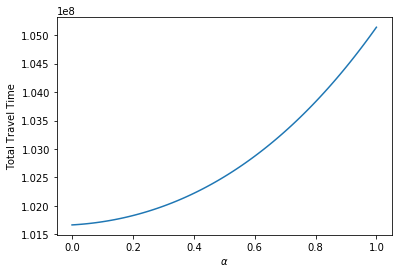

In [25]:
import matplotlib.pyplot as plt

plt.plot(alpha_vals, total_tt)
plt.xlabel(r'$\alpha$')
plt.ylabel('Total Travel Time')

In [26]:
#Calculate for each value of alpha the corresponding travel time
total_tt = []
beta_alpha = []
alpha_vals = np.linspace(0, 1, 101)
for i in alpha_vals:
    convex_comb = i*x_UE_sol + (1-i)*y_SO_sol
    total_tt_alpha = get_travel_time(convex_comb)
    total_tt.append(total_tt_alpha)
    print(i)
    #If at extremes then calculate beta according to UE and SO solutions respectively
    if i == 0:
        beta = beta_calc_dist(OD_dict_SO, convex_comb, 98)
    elif i == 1:
        beta = beta_calc_dist(OD_dict_UE, convex_comb, 98)
    else:
        beta = beta_calc_dist(OD_dict, convex_comb, 98)
    print(i)
    
    beta_alpha.append(beta)

0.0
0.0
0.01
0.01
0.02
0.02
0.03
0.03
0.04
0.04
0.05
0.05
0.06
0.06
0.07
0.07
0.08
0.08
0.09
0.09
0.1
0.1
0.11
0.11
0.12
0.12
0.13
0.13
0.14
0.14
0.15
0.15
0.16
0.16
0.17
0.17
0.18
0.18
0.19
0.19
0.2
0.2
0.21
0.21
0.22
0.22
0.23
0.23
0.24
0.24
0.25
0.25
0.26
0.26
0.27
0.27
0.28
0.28
0.29
0.29
0.3
0.3
0.31
0.31
0.32
0.32
0.33
0.33
0.34
0.34
0.35000000000000003
0.35000000000000003
0.36
0.36
0.37
0.37
0.38
0.38
0.39
0.39
0.4
0.4
0.41000000000000003
0.41000000000000003
0.42
0.42
0.43
0.43
0.44
0.44
0.45
0.45
0.46
0.46
0.47000000000000003
0.47000000000000003
0.48
0.48
0.49
0.49
0.5
0.5
0.51
0.51
0.52
0.52
0.53
0.53
0.54
0.54
0.55
0.55
0.56
0.56
0.5700000000000001
0.5700000000000001
0.58
0.58
0.59
0.59
0.6
0.6
0.61
0.61
0.62
0.62
0.63
0.63
0.64
0.64
0.65
0.65
0.66
0.66
0.67
0.67
0.68
0.68
0.6900000000000001
0.6900000000000001
0.7000000000000001
0.7000000000000001
0.71
0.71
0.72
0.72
0.73
0.73
0.74
0.74
0.75
0.75
0.76
0.76
0.77
0.77
0.78
0.78
0.79
0.79
0.8
0.8
0.81
0.81
0.8200000000000001
0.8

Text(0, 0.5, '$\\beta$')

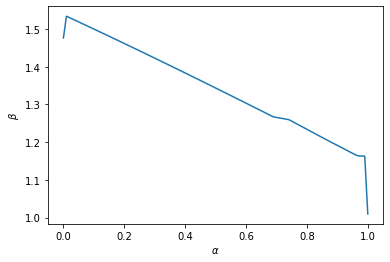

In [27]:
import matplotlib.pyplot as plt

plt.plot(alpha_vals, beta_alpha)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')

Text(0, 0.5, 'Total Travel Time')

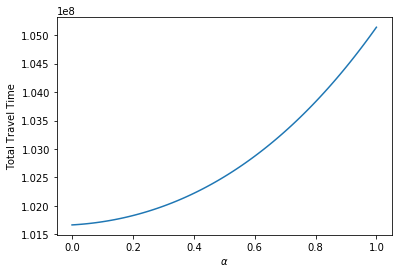

In [28]:
import matplotlib.pyplot as plt

plt.plot(alpha_vals, total_tt)
plt.xlabel(r'$\alpha$')
plt.ylabel('Total Travel Time')